### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Importing Keras

In [2]:
import keras

C:\Users\kingsumedh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importing Keras Models

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import pandas_profiling

### Running on tensorflow-gpu

In [4]:
# import tensorflow as tf
# #cpu - gpu configuration
# config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15162851217811218183
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6693025874
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9599386621594048729
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Loading the data

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/Train',
                                                 target_size=(256, 256),
                                                 batch_size= 32,
                                                 class_mode='categorical')

Found 2336 images belonging to 10 classes.


In [9]:
test_set = test_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/Test',
                                                        target_size = (256, 256),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 549 images belonging to 10 classes.


### Model with tanh activation

In [10]:
classifier = Sequential()
# Layer1
classifier.add(Convolution2D(128, (3, 3), input_shape = (256, 256,3), activation = 'tanh'))

# Layer 2
classifier.add(Convolution2D(64, (3, 3), activation = 'tanh'))

# Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'tanh'))

#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'tanh'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'tanh'))

#For the output step
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.add(Dropout(0.01))

In [12]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the model

In [14]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath = 'D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/checkp.hdf5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

plot_compare_1 = classifier.fit_generator(training_set,
                    steps_per_epoch=(2336/32),
                    epochs = 32,
                    validation_data=test_set,
                    validation_steps=(549/32), callbacks = [checkpointer])

Epoch 1/32
73/73 [==============================] - 27s 370ms/step - loss: 3.1034 - acc: 0.2521 - val_loss: 2.0572 - val_acc: 0.1858
Epoch 2/32
73/73 [==============================] - 25s 338ms/step - loss: 2.0357 - acc: 0.2920 - val_loss: 1.9774 - val_acc: 0.1931
Epoch 3/32
73/73 [==============================] - 25s 342ms/step - loss: 2.0667 - acc: 0.2791 - val_loss: 1.9992 - val_acc: 0.2987
Epoch 4/32
73/73 [==============================] - 25s 342ms/step - loss: 2.0561 - acc: 0.2842 - val_loss: 1.9781 - val_acc: 0.3042
Epoch 5/32
73/73 [==============================] - 25s 347ms/step - loss: 1.9999 - acc: 0.2894 - val_loss: 1.9918 - val_acc: 0.2696
Epoch 6/32
73/73 [==============================] - 25s 343ms/step - loss: 2.0082 - acc: 0.2932 - val_loss: 1.9700 - val_acc: 0.1821
Epoch 7/32
73/73 [==============================] - 25s 343ms/step - loss: 2.0782 - acc: 0.2855 - val_loss: 2.0079 - val_acc: 0.1858
Epoch 8/32
73/73 [==============================] - 25s 342ms/step - 

### Model with 'ReLU' activation 

In [15]:
classifier = Sequential()

In [16]:
#Creating the method for model
#Step 1- Convolution
classifier.add(Convolution2D(128, (3, 3), input_shape = (256, 256,3), activation = 'relu'))

#adding another layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

#Max pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [17]:
#Add reularizers
#classifier.add(Dense(128, input_dim = 64, classifier.add(Dense(128, input_dim = 64, classifier.add(Dense(128, input_dim = 64, classifier.add(Dense(128, input_dim = 64, 
#                      kernel_regularizer = regularizers.l1(0.001), 
#                      activity_regularizer = regularizers.l1(0.001), activation = 'relu'))

In [18]:
#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#For the output step
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.add(Dropout(0.01))

In [19]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
#Dropout = classifier.add(Dropout(0.2))

checkpointer = keras.callbacks.ModelCheckpoint(filepath = 'D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/checkp.hdf5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

plot_compare = classifier.fit_generator(training_set,
                    steps_per_epoch=(2336/32),
                    epochs = 32,
                    validation_data=test_set,
                    validation_steps=(549/32), callbacks = [checkpointer])

Epoch 1/32
73/73 [==============================] - 28s 379ms/step - loss: 1.4400 - acc: 0.5908 - val_loss: 0.6541 - val_acc: 0.8015
Epoch 2/32
73/73 [==============================] - 25s 342ms/step - loss: 0.7072 - acc: 0.8283 - val_loss: 0.4759 - val_acc: 0.8342
Epoch 3/32
73/73 [==============================] - 25s 343ms/step - loss: 0.5099 - acc: 0.8741 - val_loss: 0.4008 - val_acc: 0.8725
Epoch 4/32
73/73 [==============================] - 25s 345ms/step - loss: 0.5278 - acc: 0.8930 - val_loss: 0.3512 - val_acc: 0.8834
Epoch 5/32
73/73 [==============================] - 25s 341ms/step - loss: 0.4196 - acc: 0.9062 - val_loss: 0.3180 - val_acc: 0.9016
Epoch 6/32
73/73 [==============================] - 25s 341ms/step - loss: 0.3528 - acc: 0.9152 - val_loss: 0.4237 - val_acc: 0.8725
Epoch 7/32
73/73 [==============================] - 25s 346ms/step - loss: 0.2855 - acc: 0.9401 - val_loss: 0.3001 - val_acc: 0.9180
Epoch 8/32
73/73 [==============================] - 25s 345ms/step - 

### Plotting the validation accuracy between relu and tanh activation function

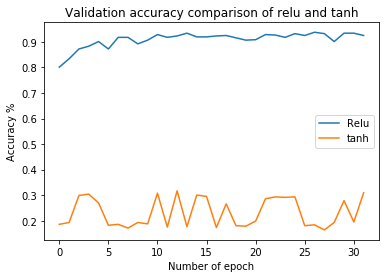

In [32]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['val_acc'])
pllt.plot(plot_compare_1.history['val_acc'])
pllt.title('Validation accuracy comparison of relu and tanh')
pllt.ylabel('Accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['Relu', 'tanh'])
pllt.show()

### Plotting the loss between relu and tanh activation function

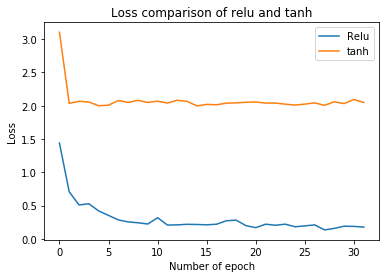

In [30]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare_1.history['loss'])
pllt.title('Loss comparison of relu and tanh')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['Relu', 'tanh'])
pllt.show()

### Plotting the accuracy between relu and tanh activation function

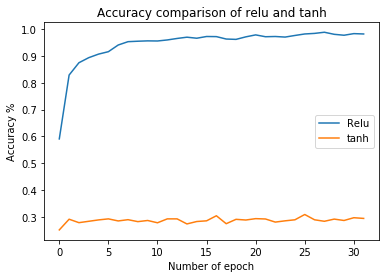

In [31]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['acc'])
pllt.plot(plot_compare_1.history['acc'])
pllt.title('Accuracy comparison of relu and tanh')
pllt.ylabel('Accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['Relu', 'tanh'])
pllt.show()